### Importing Libraries

In [1]:
import os
import random
from pathlib import Path
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

# Familiarization

## AI Images
First we will extract the extensions of the files so that we know what files we are dealing with. We will find all unique file extensions and provide some general statistics about them

In [140]:
from collections import Counter

# Find all unique file extensions in the given directory
def get_extension_counts(path):
    all_files = list(path.glob("*"))
    extensions = [file.suffix.lower() for file in all_files if file.is_file()]
    return Counter(extensions)

In [141]:
ai_data_path = Path("../data/AiArtData/AiArtData/")

extension_counts = get_extension_counts(ai_data_path)

print("File extensions found:")
for ext, count in sorted(extension_counts.items()):
    print(f"  {ext}: {count} files")

print(f"Total files: {sum(extension_counts.values())}")
print(f"Unique extensions: {list(extension_counts.keys())}")


File extensions found:
  .jpeg: 36 files
  .jpg: 385 files
  .png: 115 files
  .webp: 3 files
Total files: 539
Unique extensions: ['.png', '.jpg', '.jpeg', '.webp']


We can see that most of the files are .jpg and .png, but there are actually 3 .webp files that we could have missed if we had not gone through this step

We will now display 7 random AI images to familiarize ourselves with how AI images are supposed to look like. Futhermore we will also display their sizes, in order to see if they are the same size.

In [142]:
## Function to display random images in a grid from the given list of images
def display_random_images(image_list, num_images=4):
    rows = num_images//3 if num_images % 3 == 0 else (num_images // 3) + 1 # '//' floors the division 
    # Scale figsize based on number of rows and columns (3 columns)
    figsize = (15, rows * 4)  # 15 width for 3 columns, 4 inches per row
    fig, axes = plt.subplots(rows, 3, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array to 1D so we can index axes correctly
    
    for idx, img_path in enumerate(random.sample(image_list, min(num_images, len(image_list)))):
        # Load the image
        ai_image = Image.open(img_path)
        
        # Display the image
        axes[idx].imshow(ai_image)
        axes[idx].axis('off')  # Remove axes for cleaner look
        axes[idx].set_title(f"{img_path.name}\nSize: {ai_image.size}", fontsize=12)
    
    
    # Hide any unused subplots
    for j in range(num_images, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

539 AI-generated images found.



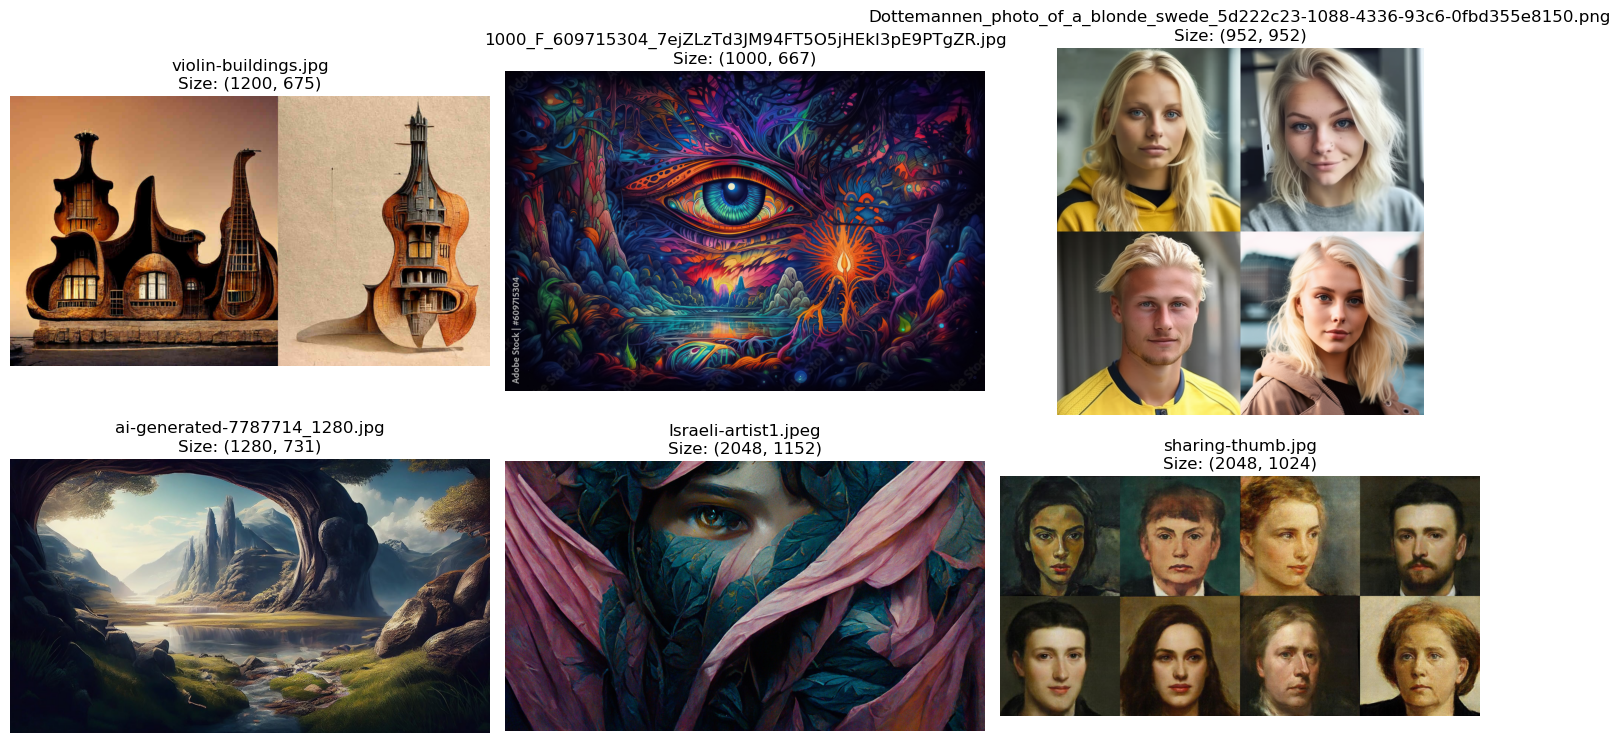

In [143]:
# Get all image files using glob with multiple extensions
ai_images_data = []
for ext in ['*.jpg', '*.jpeg', '*.png', '*.webp']:
    ai_images_data.extend(ai_data_path.glob(ext))

print(f"{len(ai_images_data)} AI-generated images found.\n")

if ai_images_data:
    # Display 6 random images in a grid
    display_random_images(ai_images_data, 6)
else:
    print("No images found in the directory")

It is important to note that images are of different size, so we need to take that into consideration during pre-processing

## Real Images
We will now do the same analysis for the real images.

In [144]:
real_data_path = Path("../data/RealArt/RealArt/")

extension_counts = get_extension_counts(real_data_path)

print("File extensions found:")
for ext, count in sorted(extension_counts.items()):
    print(f"  {ext}: {count} files")

print(f"Total files: {sum(extension_counts.values())}")
print(f"Unique extensions: {list(extension_counts.keys())}")

File extensions found:
  : 1 files
  .gif: 1 files
  .jpeg: 21 files
  .jpg: 378 files
  .png: 35 files
Total files: 436
Unique extensions: ['.png', '.jpg', '.jpeg', '', '.gif']


We can see that glob has captured 1 file with its extension being an empty string. We will find the file and display it in order to see if its an image and if its is, we will add it to our images.

1


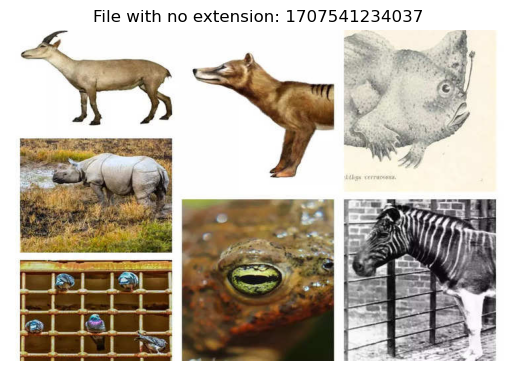

In [145]:
no_ext_files = [f for f in real_data_path.glob("*") if f.is_file() and f.suffix == ""]
print(len(no_ext_files))
for file in no_ext_files:
    img = Image.open(file)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"File with no extension: {file.name}")
    plt.show()

We can see that its clearly an image so we can safely add it to our set of real images

435 Real images found.



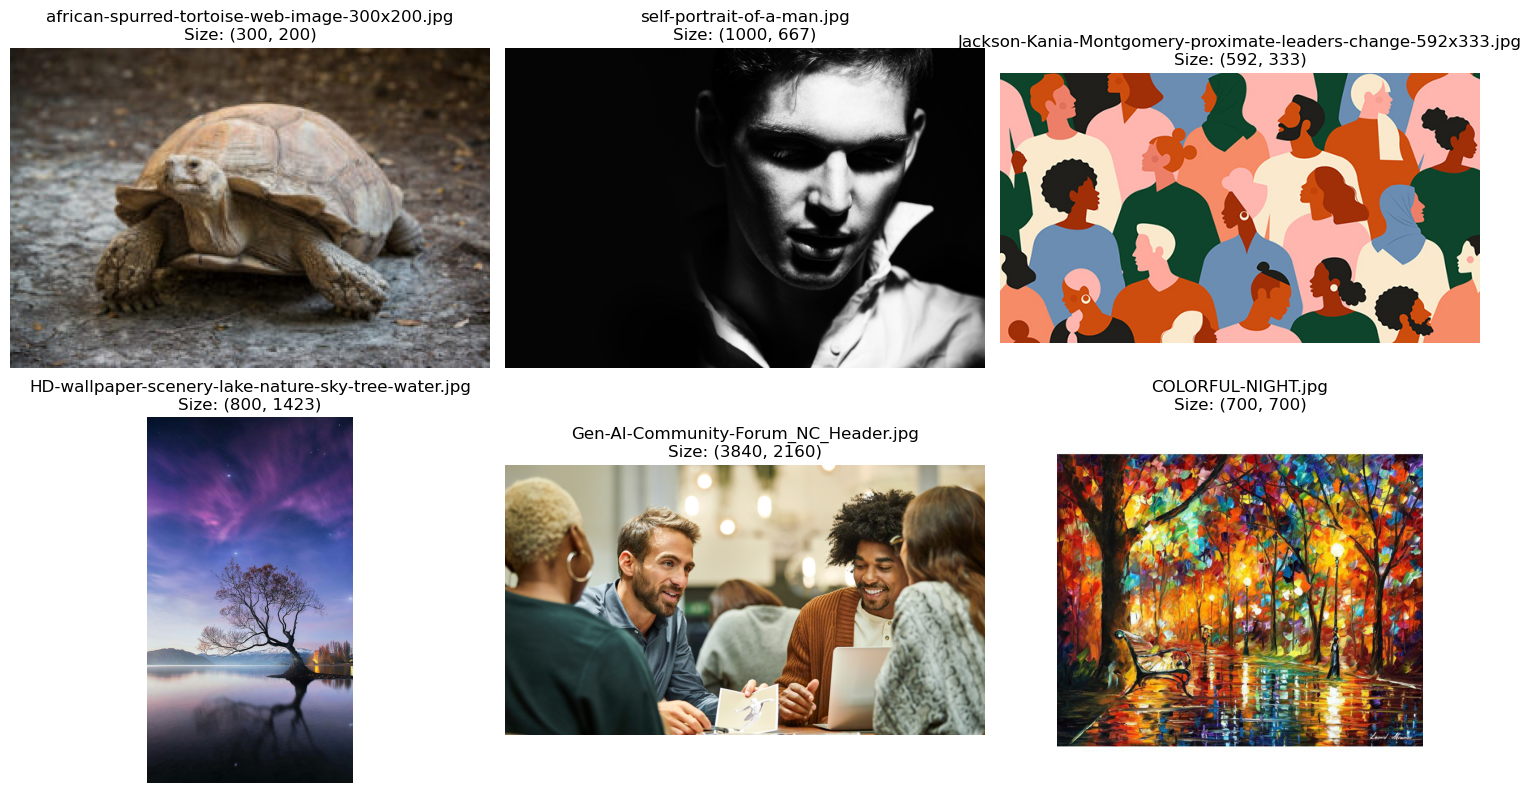

In [146]:
real_images_data = []
for file in no_ext_files:
    real_images_data.append(file)
# Add extensions
for ext in ['*.jpg', '*.jpeg', '*.png', '*.webp']:
    real_images_data.extend(real_data_path.glob(ext))

print(f"{len(real_images_data)} Real images found.\n")

if real_images_data:
    # Display 6 random images in a grid
    display_random_images(real_images_data, 6)
else:
    print("No images found in the directory")